In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the CSV data into a DataFrame
df = pd.read_csv('vg_sales.csv')


In [2]:
# Display basic info about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


In [3]:
# Summary statistics of numerical columns
print(df.describe())

               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  


In [4]:
# Check for missing values
print(df.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


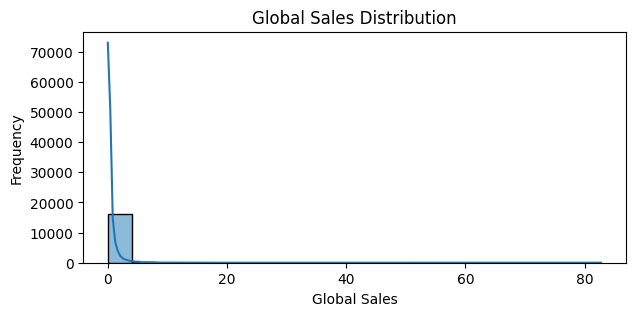

In [5]:
# Distribution of global sales
plt.figure(figsize=(7, 3))
sns.histplot(df['Global_Sales'], bins=20, kde=True)
plt.title('Global Sales Distribution')
plt.xlabel('Global Sales')
plt.ylabel('Frequency')
plt.show()


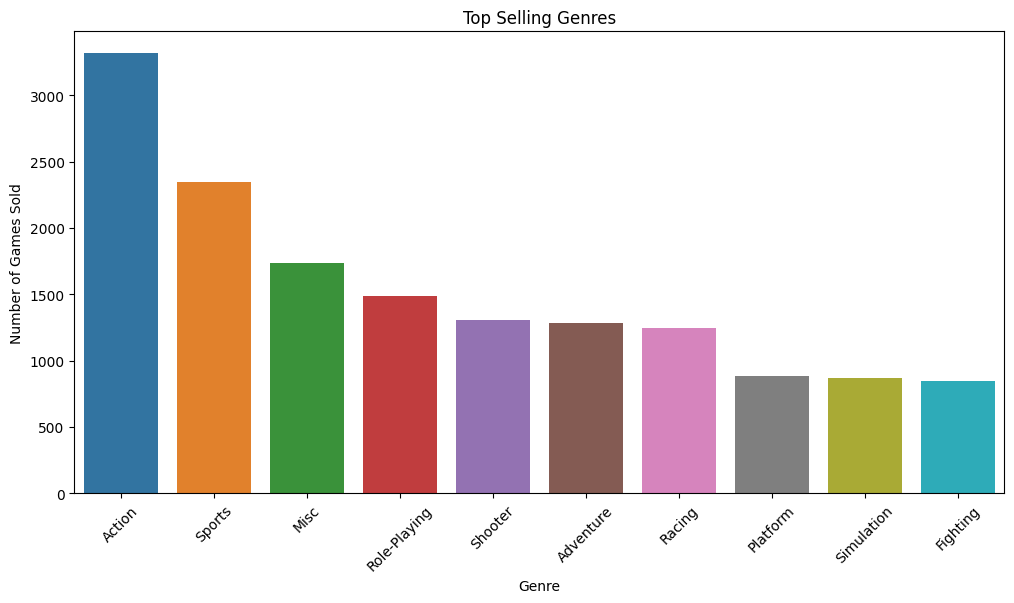

In [6]:
# Top selling genres
plt.figure(figsize=(12, 6))
top_genres = df['Genre'].value_counts().head(10)

sns.barplot(x=top_genres.index, y=top_genres.values)

plt.title('Top Selling Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Games Sold')

plt.xticks(rotation=45)
plt.show()

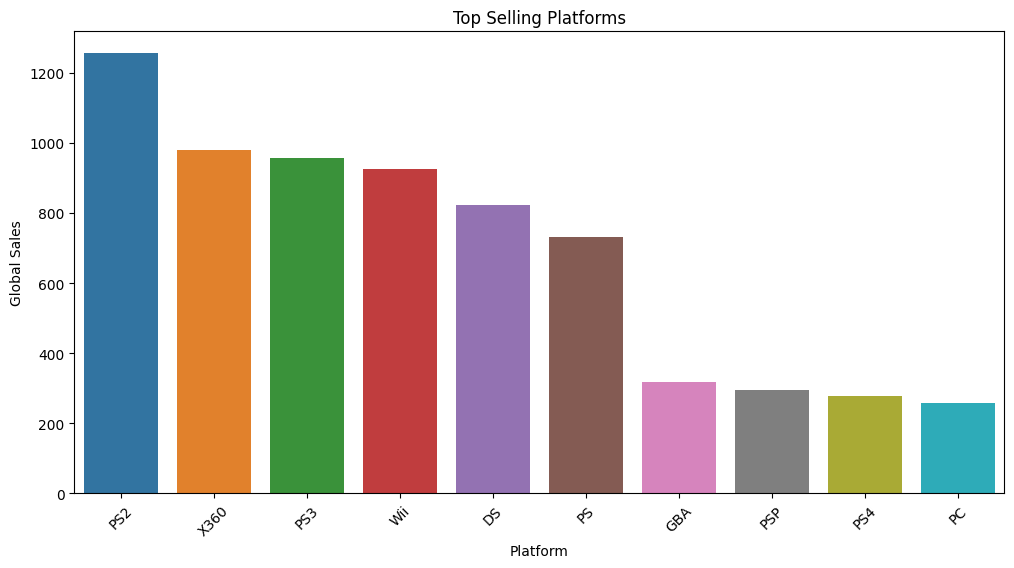

In [7]:
# Top selling platforms
plt.figure(figsize=(12, 6))
top_platforms = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_platforms.index, y=top_platforms.values)

plt.title('Top Selling Platforms')
plt.xlabel('Platform')
plt.ylabel('Global Sales')

plt.xticks(rotation=45)
plt.show()


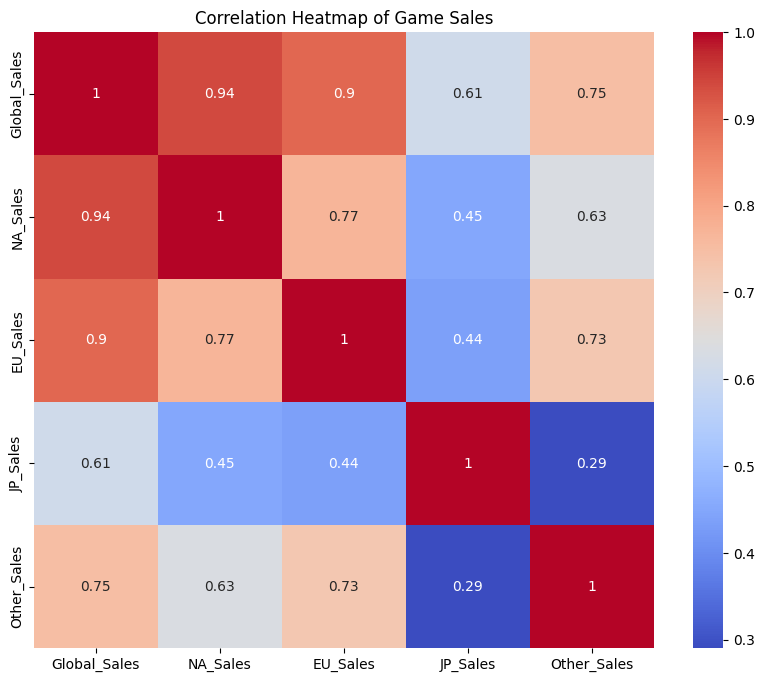

In [8]:
# Select columns related to game sales
sales_columns = ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

# Calculate the correlation matrix for selected columns
correlation_matrix = df[sales_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Game Sales')
plt.show()
